In [ ]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.1 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 kB)

In [ ]:
!pip install prophet

In [2]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv("dataframe (w_o test).csv")
df = df[['Date', 'Aceh']]

In [6]:
df.rename(columns = {'Aceh':'Aceh'}, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1004 non-null   object 
 1   Aceh    1004 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [8]:
df['Date'] = pd.DatetimeIndex(df['Date'])
df.dtypes

,0
Date,datetime64[ns]
Aceh,float64


In [9]:
df = df.rename(columns={'Date': 'ds',
                        'Aceh': 'y'})

df.head()

,ds,y
0,2022-01-01,22360.0
1,2022-01-02,23340.0
2,2022-01-03,22050.0
3,2022-01-04,22460.0
4,2022-01-05,19630.0


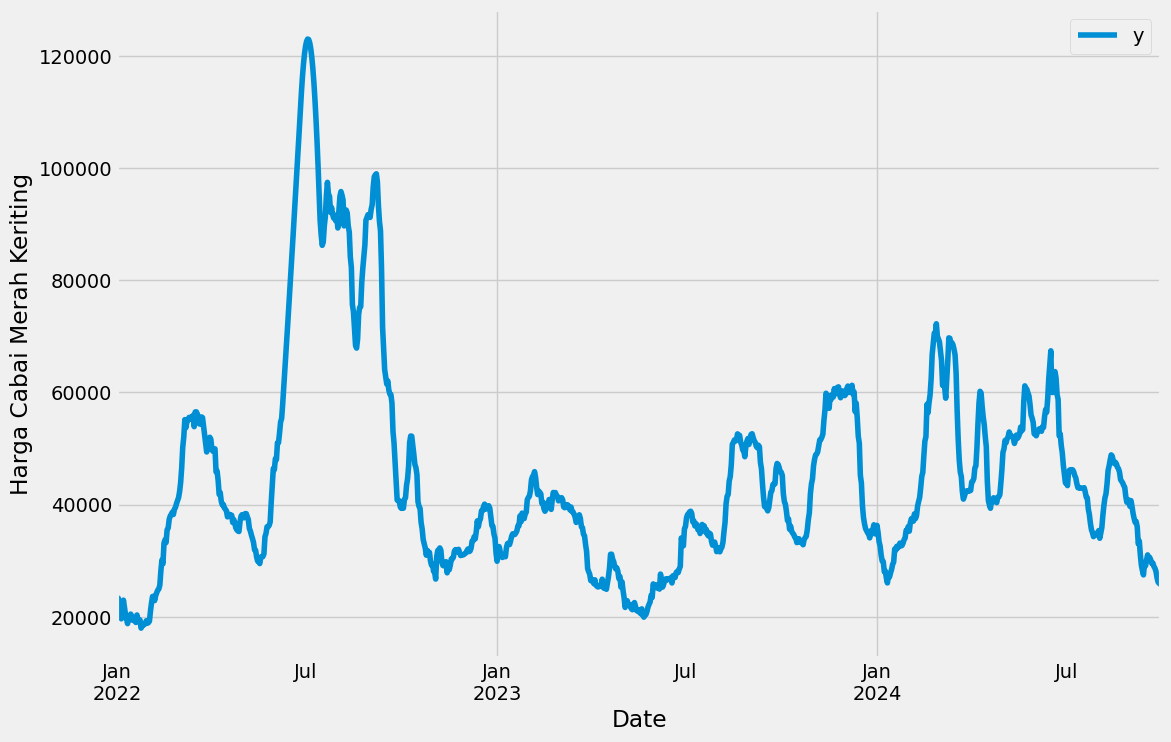

In [10]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Harga Cabai Merah Keriting')
ax.set_xlabel('Date')

plt.show()

In [11]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [12]:
my_model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9v2u81vd/3_chsg25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9v2u81vd/1sd0vw0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22190', 'data', 'file=/tmp/tmp9v2u81vd/3_chsg25.json', 'init=/tmp/tmp9v2u81vd/1sd0vw0k.json', 'output', 'file=/tmp/tmp9v2u81vd/prophet_modelw_ze_a1x/prophet_model-20250315145601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
future_dates = my_model.make_future_dataframe(periods=1, freq='D')
future_dates.head()

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05


In [22]:
future_dates.tail()

,ds
1000,2024-09-27
1001,2024-09-28
1002,2024-09-29
1003,2024-09-30
1004,2024-10-01


In [23]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,11794.305307,-6024.009132,28813.174846
1,2022-01-02,11925.822155,-5899.411446,29067.154381
2,2022-01-03,11776.400218,-6421.790056,30541.364014
3,2022-01-04,11896.710780,-7050.816859,28644.364119
4,2022-01-05,11860.394683,-5941.372880,30252.919561


In [ ]:
forecast.tail(200)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1004,2024-10-01,23224.378521,-1996.807597,32984.286305,23224.378521,23224.378521,-7720.868859,-7720.868859,-7720.868859,49.347485,49.347485,49.347485,-7770.216344,-7770.216344,-7770.216344,0.0,0.0,0.0,15503.509663
1005,2024-10-02,23075.148468,-4507.955620,32830.194864,23075.148468,23078.499858,-8415.482723,-8415.482723,-8415.482723,-70.633171,-70.633171,-70.633171,-8344.849553,-8344.849553,-8344.849553,0.0,0.0,0.0,14659.665745
1006,2024-10-03,22925.918414,-2845.546562,31543.475253,22909.611226,22947.755344,-9033.345283,-9033.345283,-9033.345283,-148.541384,-148.541384,-148.541384,-8884.803899,-8884.803899,-8884.803899,0.0,0.0,0.0,13892.573131
1007,2024-10-04,22776.688361,-4210.452071,30662.801114,22733.427411,22825.325761,-9419.215340,-9419.215340,-9419.215340,-25.284476,-25.284476,-25.284476,-9393.930864,-9393.930864,-9393.930864,0.0,0.0,0.0,13357.473021
1008,2024-10-05,22627.458308,-4872.786960,31433.904919,22554.807994,22702.124929,-9832.680348,-9832.680348,-9832.680348,43.607809,43.607809,43.607809,-9876.288157,-9876.288157,-9876.288157,0.0,0.0,0.0,12794.777960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,2025-04-14,-5875.481896,-48313.922409,29885.008440,-44292.637785,28122.408992,-3550.856816,-3550.856816,-3550.856816,-14.641906,-14.641906,-14.641906,-3536.214910,-3536.214910,-3536.214910,0.0,0.0,0.0,-9426.338712
1200,2025-04-15,-6024.711950,-51745.316924,29156.884451,-44728.333796,28160.459428,-3648.775542,-3648.775542,-3648.775542,49.347485,49.347485,49.347485,-3698.123027,-3698.123027,-3698.123027,0.0,0.0,0.0,-9673.487492
1201,2025-04-16,-6173.942003,-49198.606611,31817.450491,-45164.029807,28197.039014,-3944.224848,-3944.224848,-3944.224848,-70.633171,-70.633171,-70.633171,-3873.591678,-3873.591678,-3873.591678,0.0,0.0,0.0,-10118.166851
1202,2025-04-17,-6323.172056,-53956.492570,31168.971081,-45597.606676,28232.977128,-4210.621340,-4210.621340,-4210.621340,-148.541384,-148.541384,-148.541384,-4062.079955,-4062.079955,-4062.079955,0.0,0.0,0.0,-10533.793396


In [ ]:
forecast.tail

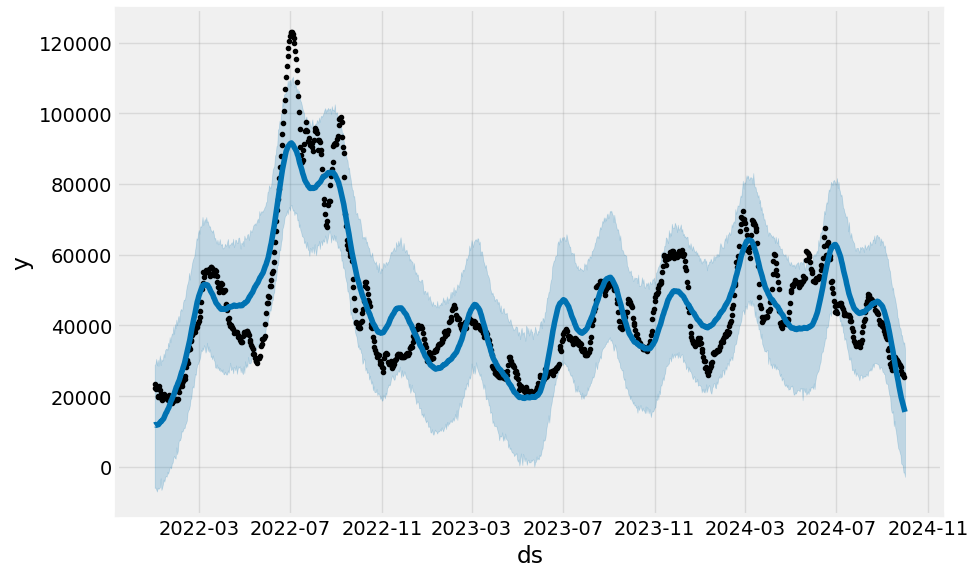

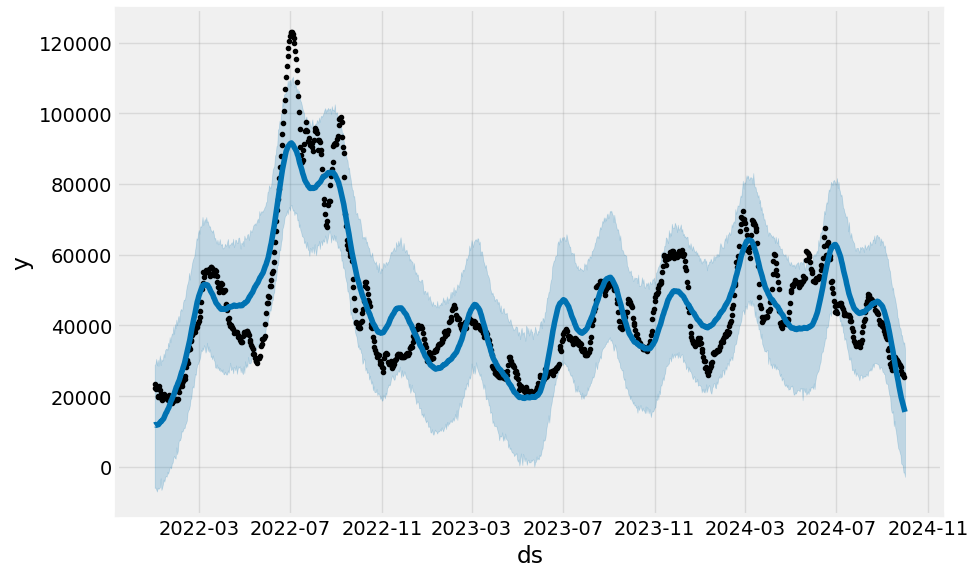

In [24]:
my_model.plot(forecast, uncertainty=True)

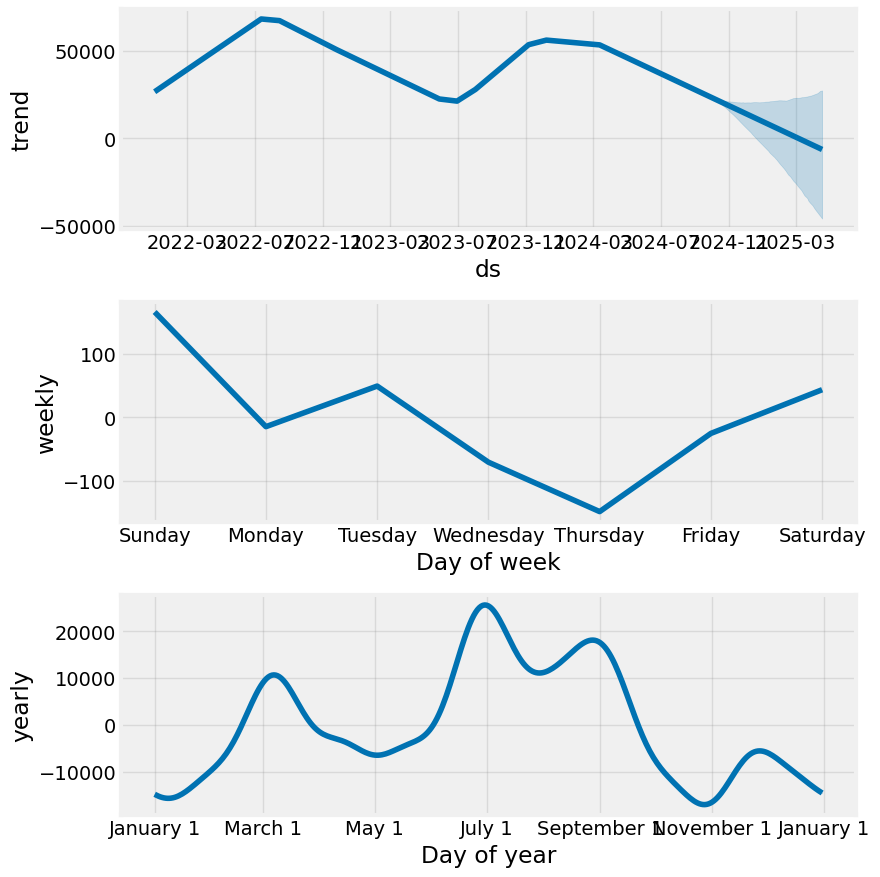

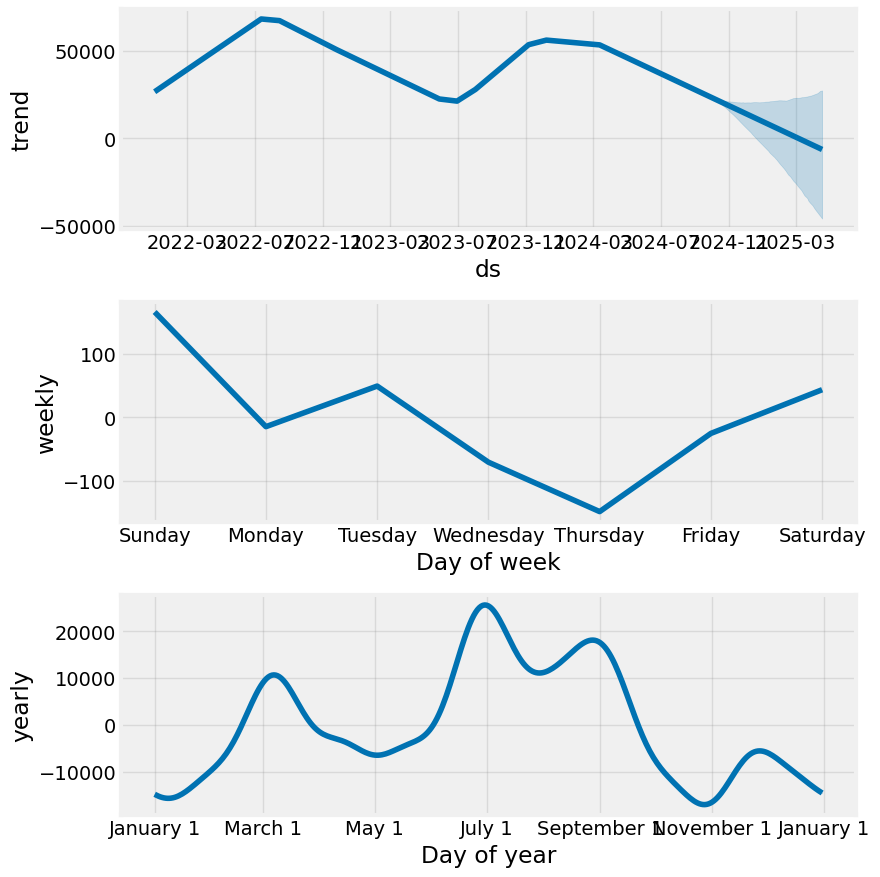

In [ ]:
my_model.plot_components(forecast)

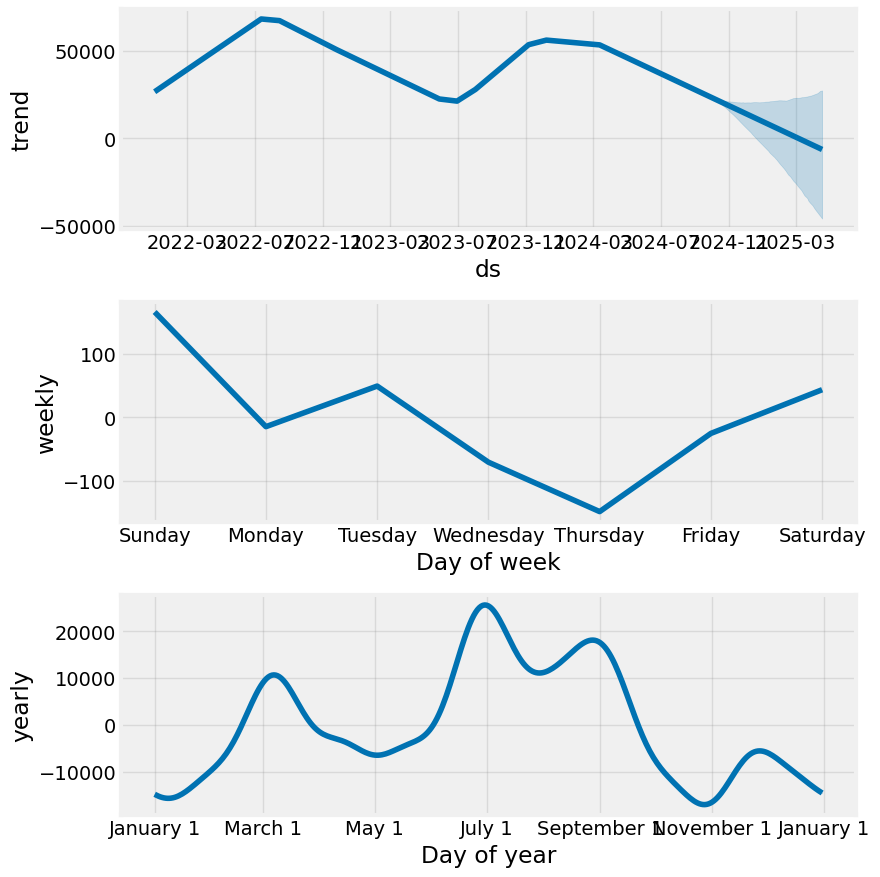

In [ ]:
fig1 = my_model.plot_components(forecast)

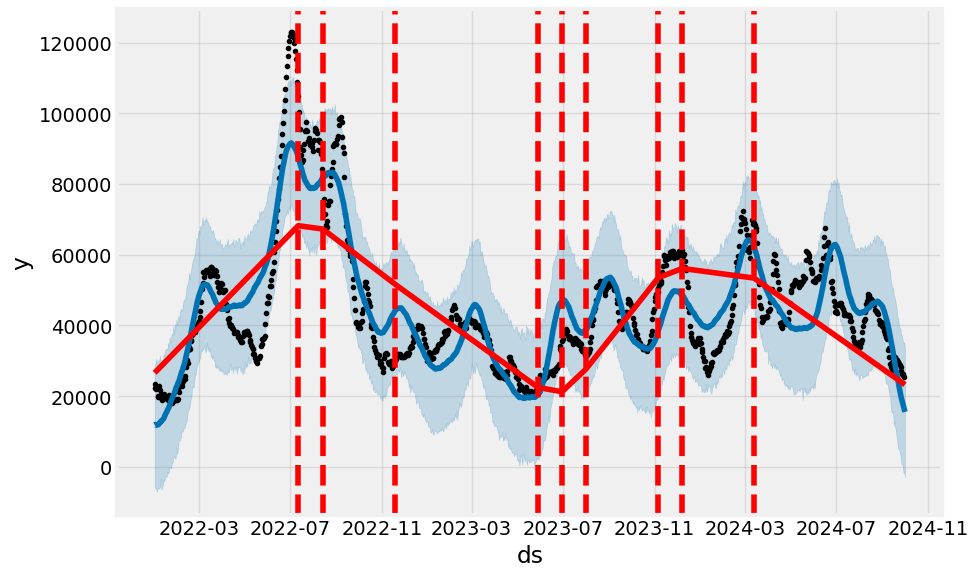

In [25]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

In [26]:
my_model.changepoints

,ds
32,2022-02-02
64,2022-03-06
96,2022-04-07
128,2022-05-09
160,2022-06-10
192,2022-07-12
225,2022-08-14
257,2022-09-15
289,2022-10-17
321,2022-11-18


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsap67w90/wvxyfpxa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsap67w90/jiyqe854.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87342', 'data', 'file=/tmp/tmpsap67w90/wvxyfpxa.json', 'init=/tmp/tmpsap67w90/jiyqe854.json', 'output', 'file=/tmp/tmpsap67w90/prophet_modelalguvhds/prophet_model-20250315101311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:13:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


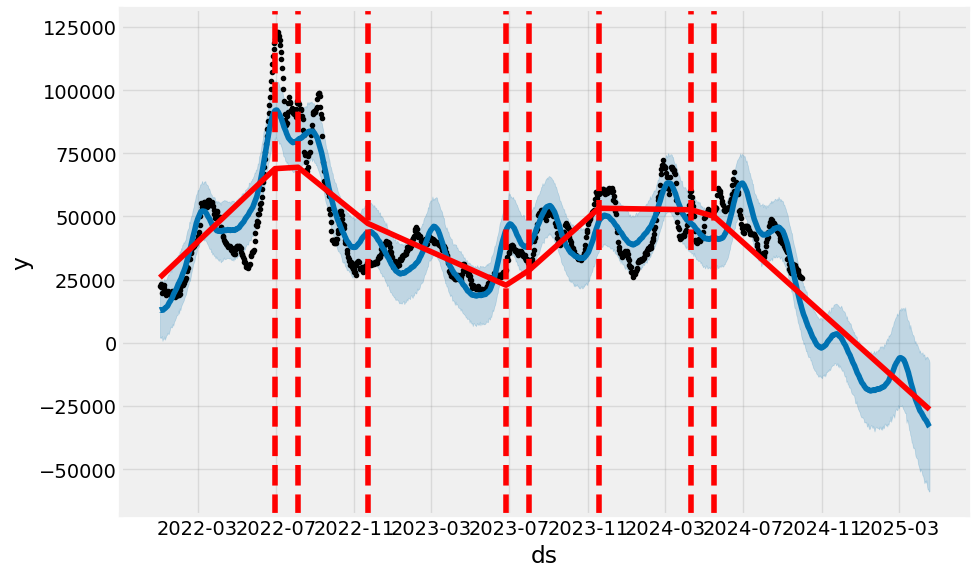

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsap67w90/mca_hmhz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsap67w90/yjaqfbgd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32376', 'data', 'file=/tmp/tmpsap67w90/mca_hmhz.json', 'init=/tmp/tmpsap67w90/yjaqfbgd.json', 'output', 'file=/tmp/tmpsap67w90/prophet_modelvfnscqb2/prophet_model-20250315101316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:13:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


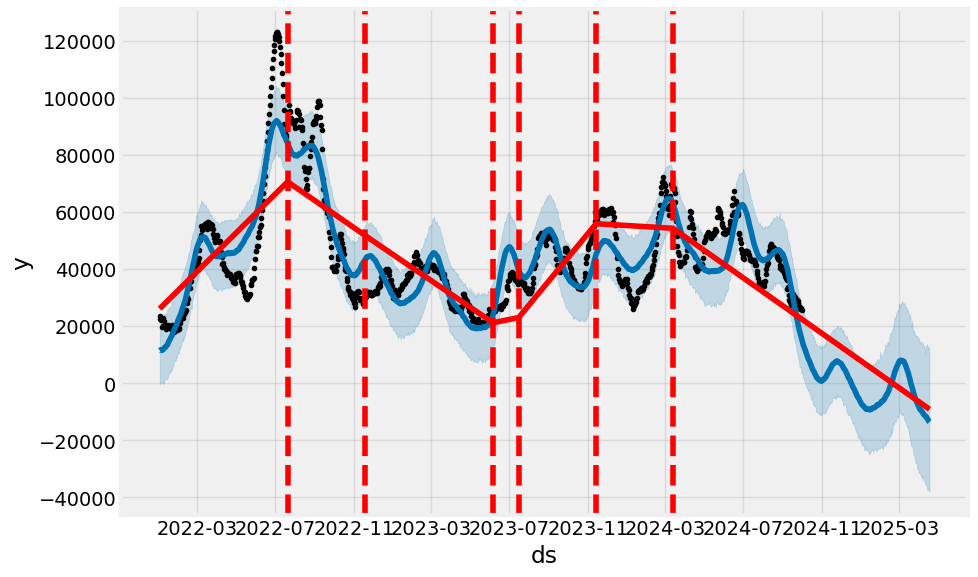

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsap67w90/eo9ifhf9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsap67w90/q_gw53sp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18427', 'data', 'file=/tmp/tmpsap67w90/eo9ifhf9.json', 'init=/tmp/tmpsap67w90/q_gw53sp.json', 'output', 'file=/tmp/tmpsap67w90/prophet_modelalopbd68/prophet_model-20250315101322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:13:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


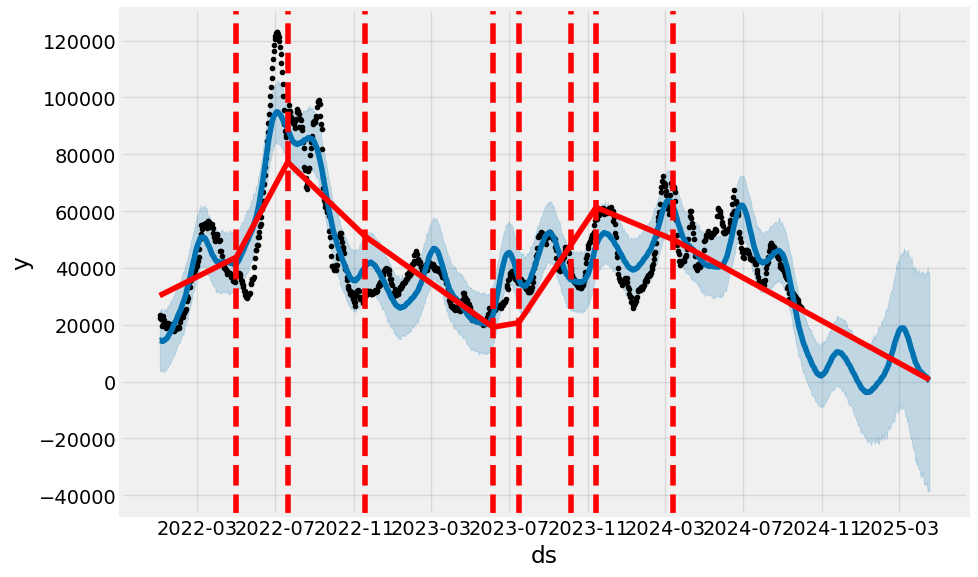

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsap67w90/dqz7o6yy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsap67w90/2ernfth2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34851', 'data', 'file=/tmp/tmpsap67w90/dqz7o6yy.json', 'init=/tmp/tmpsap67w90/2ernfth2.json', 'output', 'file=/tmp/tmpsap67w90/prophet_modelb4usiel9/prophet_model-20250315101325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:13:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


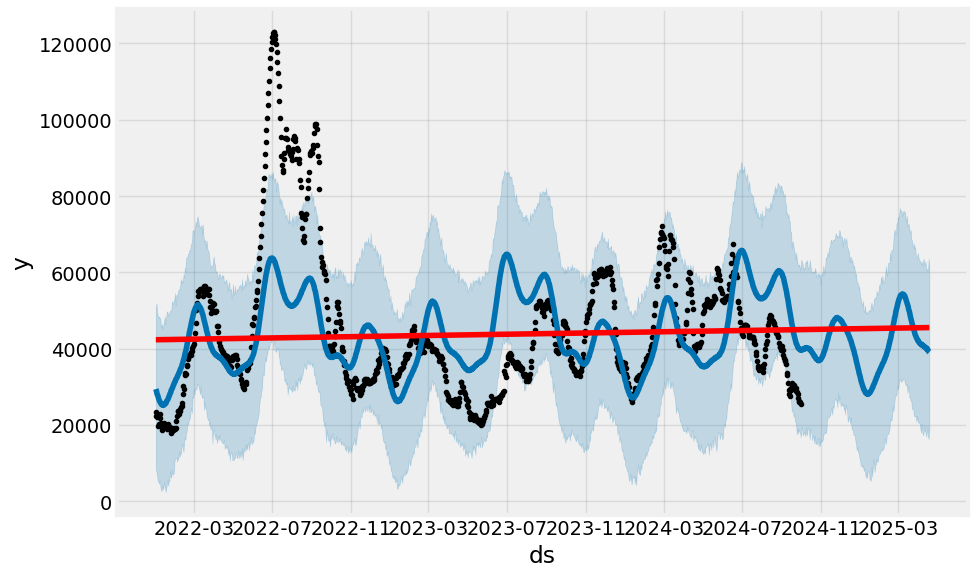

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)